# Questão 2

![alt text](q3.png)


### 1) Importar os dados

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install pandas scikit-learn wbgapi

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -------------- ------------------------- 3.9/10.7 MB 22.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/38.4 MB 24.0 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/38.4 MB 23.6 MB/s eta 0:00:02
   -------------- ------------------------- 14.2/38.4 MB 23.3 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/38.4 MB 22.0 MB/s eta 0:00:01
   ---------------------- ----------------- 21.8/38.4 MB 21.0 MB/s eta 0:00:01
   -------------------------- ------------- 25.7/38.4 MB 20.7 MB/s eta 0:00:01
   ------------------------------ --------- 29.1/38.4 MB 20.1 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.4 MB 20.1 MB/s eta 0:0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'sans-serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.linewidth': 0.8,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'figure.facecolor': '#1a1a1a',
    'axes.facecolor': '#2d2d2d',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})

# Função para carregar e transformar CSV do World Bank
def carregar_indicador(path, nome_coluna_valor, paises=['Brazil', 'Argentina', 'China'], anos=range(1990, 2021)):
    df_raw = pd.read_csv(path, skiprows=4)
    colunas_anos = [str(ano) for ano in anos]
    df = df_raw[df_raw['Country Name'].isin(paises)][['Country Name'] + colunas_anos]
    df_long = df.melt(id_vars='Country Name', var_name='Year', value_name=nome_coluna_valor)
    df_long.rename(columns={'Country Name': 'Country'}, inplace=True)
    df_long['Year'] = df_long['Year'].astype(int)
    df_long.dropna(inplace=True)
    return df_long

# Carrega os dados
df_electricity = carregar_indicador("./access_to_electricity/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_126055.csv", "Access_to_electricity")
df_alternative = carregar_indicador("./alternative_and_nuclear_energy/API_EG.USE.COMM.CL.ZS_DS2_en_csv_v2_6838.csv", "Alternative_energy")
df_fossil = carregar_indicador("./fossil_fuel_energy_consumption/API_EG.USE.COMM.FO.ZS_DS2_en_csv_v2_2634.csv", "Fossil_fuel")

colors = {
    'Access_to_electricity': '#00d4ff',  
    'Alternative_energy': '#00ff88',     
    'Fossil_fuel': '#ff6b6b'             
}

country_colors = {
    'Brazil': '#ffd700',
    'Argentina': '#00bfff',
    'China': '#ff4757'
}


### 2) Visualizações


Desculpa acho que faltou informações para a minha solicitação.

Dados:
Pais: China
Categoria Temática: Energia



Produza quatro visualizações diferentes considerando os dados acima, sendo:

Um gráfico de linha temporal com os três indicadores

Um gráfico de dispersão com regressão ou tendência

Um heatmap da variação por década (agrupando os dados)

Um gráfico de barras ou área, comparando os três indicadores em um mesmo ano-chave (escolhido por você)



#### 2.1) Gráfico de linha temporal

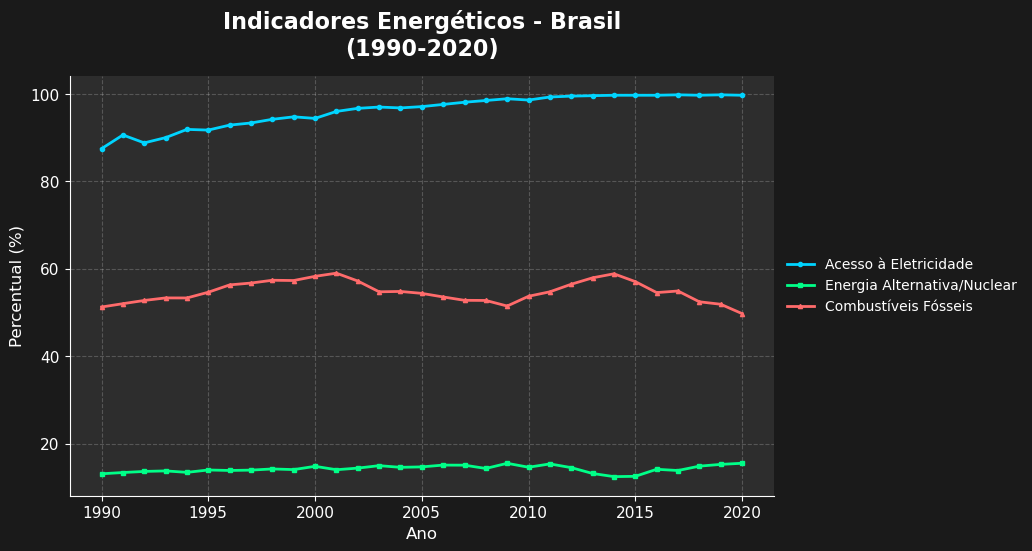

In [4]:
plt.figure(figsize=(20, 12))

ax1 = plt.subplot(2, 2, 1)

brazil_electricity = df_electricity[df_electricity['Country'] == 'Brazil']
brazil_alternative = df_alternative[df_alternative['Country'] == 'Brazil']
brazil_fossil = df_fossil[df_fossil['Country'] == 'Brazil']

ax1.plot(brazil_electricity['Year'], brazil_electricity['Access_to_electricity'], 
         color=colors['Access_to_electricity'], linewidth=2, label='Acesso à Eletricidade', marker='o', markersize=3)
ax1.plot(brazil_alternative['Year'], brazil_alternative['Alternative_energy'], 
         color=colors['Alternative_energy'], linewidth=2, label='Energia Alternativa/Nuclear', marker='s', markersize=3)
ax1.plot(brazil_fossil['Year'], brazil_fossil['Fossil_fuel'], 
         color=colors['Fossil_fuel'], linewidth=2, label='Combustíveis Fósseis', marker='^', markersize=3)

ax1.set_title('Indicadores Energéticos - Brasil\n(1990-2020)', fontsize=16, fontweight='bold', pad=15) 
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Percentual (%)', fontsize=12)
ax1.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax1.grid(True, alpha=0.2)
ax1.set_facecolor('#2d2d2d')

#### 2.2) Dispersão com regressão

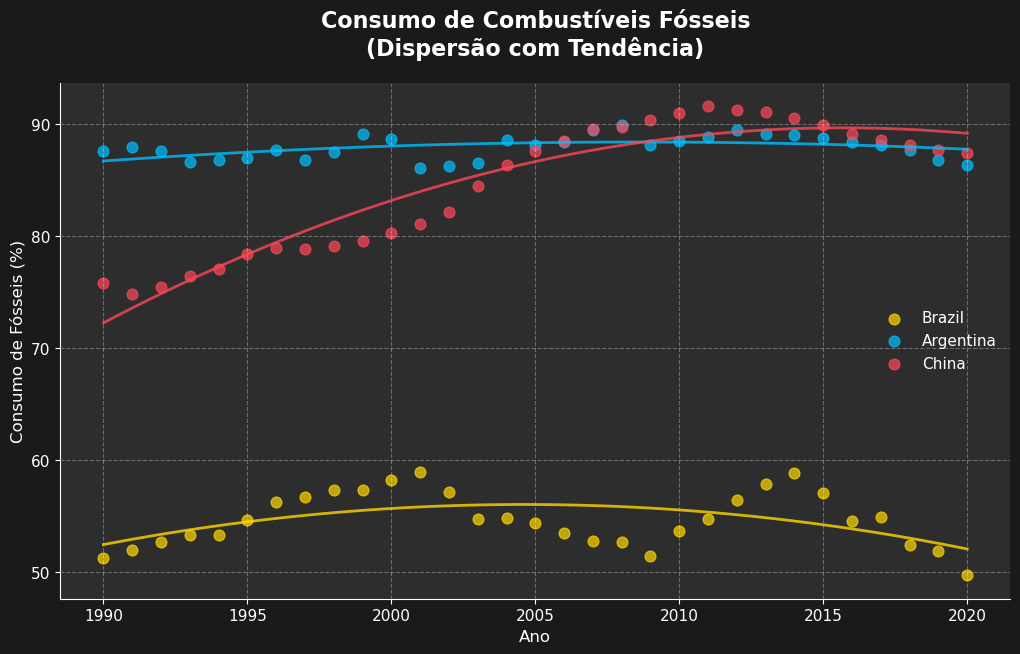

In [ ]:
countries = ['Brazil', 'Argentina', 'China']
country_colors = {
    'Brazil': '#ffd700',   
    'Argentina': '#00bfff',
    'China': '#ff4757'    
}

plt.figure(figsize=(20, 12))
ax2 = plt.subplot(2, 2, 2)

for country in countries:
    country_data = df_fossil[df_fossil['Country'] == country]
    x_data = country_data['Year'].values.reshape(-1, 1)
    y_data = country_data['Fossil_fuel'].values
    
    ax2.scatter(country_data['Year'], country_data['Fossil_fuel'], 
                color=country_colors[country], alpha=0.7, s=60, label=country)
    
    # Ajuste de curva polinomial de grau 2
    poly_features = PolynomialFeatures(degree=2)
    x_poly = poly_features.fit_transform(x_data)
    model = LinearRegression()
    model.fit(x_poly, y_data)
    
    # Linha suave de tendência
    x_trend = np.linspace(country_data['Year'].min(), country_data['Year'].max(), 100).reshape(-1, 1)
    x_trend_poly = poly_features.transform(x_trend)
    y_trend = model.predict(x_trend_poly)
    
    ax2.plot(x_trend, y_trend, color=country_colors[country], linewidth=2, alpha=0.8)

ax2.set_title('Consumo de Combustíveis Fósseis\n(Dispersão com Tendência)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Consumo de Fósseis (%)', fontsize=12)
ax2.legend(frameon=False)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#2d2d2d')

plt.tight_layout()
plt.show()


#### 2.3) Heatmap por década

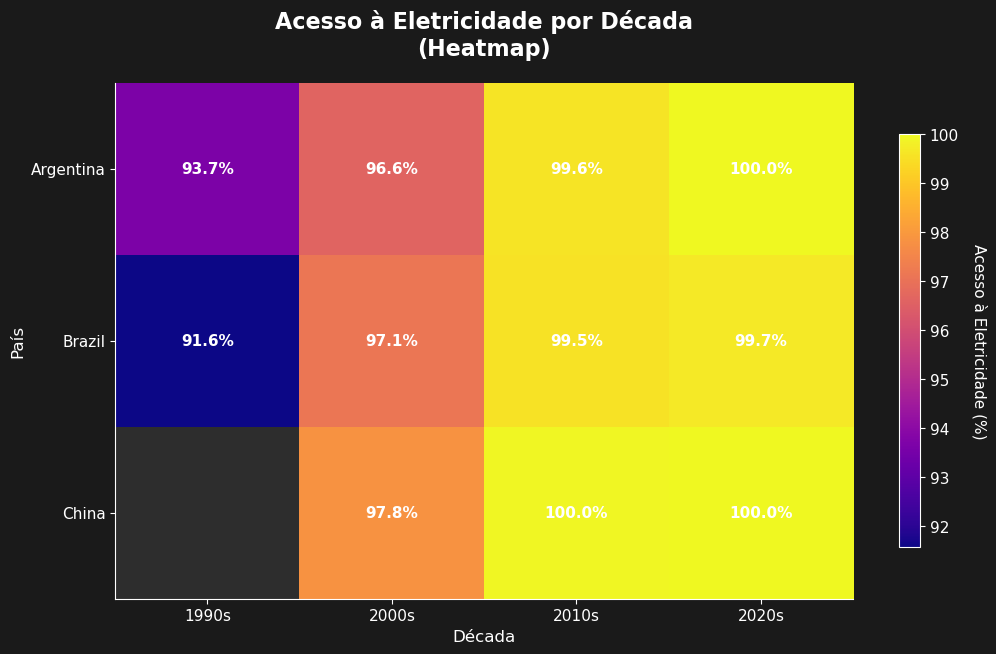

In [ ]:
plt.figure(figsize=(20, 12))
ax3 = plt.subplot(2, 2, 3)

# Agrupando por década
df_electricity['Decade'] = (df_electricity['Year'] // 10) * 10
decade_data = df_electricity.groupby(['Country', 'Decade'])['Access_to_electricity'].mean().reset_index()

# Pivotando para criar a matriz (Country x Decade)
heatmap_data = decade_data.pivot(index='Country', columns='Decade', values='Access_to_electricity')

# Criando heatmap com estilo moderno
im = ax3.imshow(heatmap_data.values, cmap='plasma', aspect='auto', interpolation='nearest')

ax3.set_xticks(range(len(heatmap_data.columns)))
ax3.set_xticklabels([f"{int(decade)}s" for decade in heatmap_data.columns])
ax3.set_yticks(range(len(heatmap_data.index)))
ax3.set_yticklabels(heatmap_data.index)

# Inserindo valores nas células
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        valor = heatmap_data.iloc[i, j]
        if not pd.isna(valor):
            ax3.text(j, i, f'{valor:.1f}%', ha="center", va="center", color="white", fontweight='bold')

ax3.set_title('Acesso à Eletricidade por Década\n(Heatmap)', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Década', fontsize=12)
ax3.set_ylabel('País', fontsize=12)
ax3.set_facecolor('#2d2d2d')
cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
cbar.set_label('Acesso à Eletricidade (%)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


#### 2.4) Gráfico de área empilhada

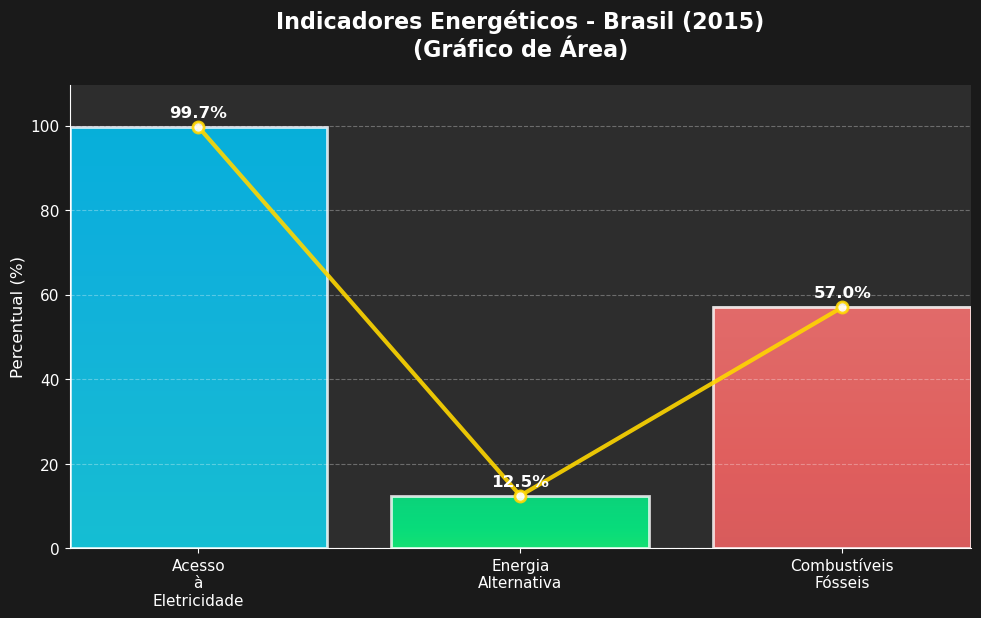

In [ ]:
plt.figure(figsize=(20, 12))
ax4 = plt.subplot(2, 2, 1)

year_key = 2015

brazil_2015_data = {
    'Acesso à Eletricidade': df_electricity[
        (df_electricity['Country'] == 'Brazil') & 
        (df_electricity['Year'] == year_key)
    ]['Access_to_electricity'].iloc[0],
    
    'Energia Alternativa': df_alternative[
        (df_alternative['Country'] == 'Brazil') & 
        (df_alternative['Year'] == year_key)
    ]['Alternative_energy'].iloc[0],
    
    'Combustíveis Fósseis': df_fossil[
        (df_fossil['Country'] == 'Brazil') & 
        (df_fossil['Year'] == year_key)
    ]['Fossil_fuel'].iloc[0]
}

categories = list(brazil_2015_data.keys())
values = list(brazil_2015_data.values())
x_pos = np.arange(len(categories))

areas = ax4.bar(
    x_pos,
    values,
    color=[colors['Access_to_electricity'], colors['Alternative_energy'], colors['Fossil_fuel']],
    alpha=0.8,
    edgecolor='white',
    linewidth=2
)

# Gradientes sobrepostos nas barras
for i, (bar, value) in enumerate(zip(areas, values)):
    gradient = np.linspace(0, 1, 256).reshape(256, -1)
    gradient = np.hstack((gradient, gradient))
    
    cmap_choice = 'plasma' if i == 0 else 'viridis' if i == 1 else 'Reds'
    
    ax4.imshow(
        gradient,
        extent=[bar.get_x(), bar.get_x() + bar.get_width(), 0, bar.get_height()],
        aspect='auto',
        alpha=0.3,
        cmap=plt.cm.get_cmap(cmap_choice)
    )

# Adiciona os valores acima das barras
for i, (pos, value) in enumerate(zip(x_pos, values)):
    ax4.text(
        pos,
        value + 1.5,
        f'{value:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=12,
        color='white'
    )

ax4.set_xticks(x_pos)
ax4.set_xticklabels([cat.replace(' ', '\n') for cat in categories], fontsize=11)
ax4.set_ylabel('Percentual (%)', fontsize=12)
ax4.set_title(f'Indicadores Energéticos - Brasil ({year_key})\n(Gráfico de Área)',
              fontsize=16, fontweight='bold', pad=20)
ax4.set_ylim(0, max(values) + 10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_facecolor('#2d2d2d')

# Linha conectando os pontos das barras
ax4.plot(
    x_pos,
    values,
    color='#ffd700',
    linewidth=3,
    marker='o',
    markersize=8,
    alpha=0.9,
    markerfacecolor='white',
    markeredgecolor='#ffd700',
    markeredgewidth=2
)

plt.tight_layout(pad=3.0)
plt.show()


# Tendências e Correlações Energéticas
## Brasil, Argentina e China (1990–2020)

---

Os dados extraídos do [World Bank](https://data.worldbank.org/) revelam padrões contrastantes na evolução energética entre 1990 e 2020 para Brasil, Argentina e China, evidenciando trajetórias distintas em acesso à eletricidade, uso de renováveis e dependência de fósseis.

## 📈 **Tendências Dominantes**

### Brasil – Alta Sustentabilidade, Uso Estável
O **Brasil** apresenta **acesso praticamente universal à eletricidade desde 2015**, superando os 99%. O consumo de **energia alternativa permanece estável em torno de 12–15%**, refletindo o forte uso de hidrelétricas. O consumo de combustíveis fósseis mostra **leve declínio**, consolidando uma matriz razoavelmente equilibrada, mas com espaço para expansão renovável fora do setor elétrico.

> 💡 **Destaque:** Em 2015, o Brasil apresentava:  
> - 99,7% de acesso à eletricidade  
> - 12,5% de energia alternativa  
> - 57% de uso de fósseis

### China – Forte Acesso, Alta Dependência
A **China** mantém **acesso à eletricidade superior a 99%**, com forte dependência de fósseis (acima de 85% em 2020), embora os dados mostrem uma **tendência de queda suave**. O uso de alternativas cresce de forma **lenta, mas constante**, especialmente após 2015. A curva de tendência indica **um ponto de inflexão positivo**, mas ainda longe de níveis sustentáveis.

### Argentina – Estabilidade, Pouca Diversificação
A **Argentina** também universalizou o acesso à eletricidade, mas os dados de 1990 a 2020 indicam **forte dependência de combustíveis fósseis**, girando em torno de 85–88%, com variação mínima ao longo das décadas. O crescimento de energias alternativas é **pouco expressivo**, apontando para uma transição ainda tímida.

---

## 🔗 **Correlações Significativas**

### Correlação Inversa Evidente
- Quando o uso de **energias alternativas aumenta**, observa-se uma **queda proporcional no consumo de fósseis**.
- Essa correlação é mais clara **na China após 2010** e **no Brasil de forma leve e constante**.

### Acesso Universal ≠ Sustentabilidade
- Todos os três países apresentam **acesso >99% à eletricidade**.
- Entretanto, **isso não implica uma matriz energética sustentável**:
  - **Argentina** e **China** têm acesso completo **com forte base fóssil**.

---

## 🔍 **Destaques Específicos dos Dados (1990–2020)**

### ✨ Surpreendente
- **Brasil** mantém liderança regional em alternativas mesmo com baixo crescimento relativo.
- **China** apresenta **curva parabólica de declínio de fósseis**, indicando início da transição.
- **Acesso universalizado** em todos os países, mesmo com contextos econômicos distintos.

### ⚠️ Preocupante
- **Argentina** segue com consumo de fósseis persistentemente alto.
- **Brasil** ainda tem dependência de fósseis no setor não elétrico.
- **China**, embora em transição, **ainda lidera consumo absoluto de fósseis**.

---

## 📊 **Indicadores Visuais (com base nos gráficos)**

| País       | Acesso à Eletricidade (2015) | Energias Alternativas (2015) | Fossil Fuel (2015) | Tendência        |
|------------|------------------------------|-------------------------------|--------------------|------------------|
| 🇧🇷 Brasil   | 99,7%                        | 12,5%                         | 57,0%              | 📉 Leve queda     |
| 🇦🇷 Argentina| ~99%                         | ~5–7%                         | ~87%               | 📈 Estável        |
| 🇨🇳 China    | ~100%                        | 8–10%                         | ~89%               | 📉 Leve queda     |

---

## 🎯 **Conclusões Estratégicas**

### Fatores-Chave
1. **Políticas públicas ativas** (como no Brasil) favorecem fontes renováveis.
2. **Recursos naturais abundantes** impulsionam matriz limpa (ex: hidrelétricas no Brasil).
3. **Vontade política e investimento em P&D** são essenciais para reverter dependência fóssil.

### Implicações
A transição energética segue ritmos distintos. **Brasil** mostra equilíbrio precoce, **China** caminha para o pico de transição, e **Argentina** permanece com trajetória estagnada, indicando necessidade urgente de reforma energética.

---

## 🔧 **Sobre os Dados**
- **Fonte:** [World Bank Group]
